<a href="https://colab.research.google.com/github/Slzl/Naive-Bayes/blob/main/Naive%20Bayes%20Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/content/Courses.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data='/content/Courses.csv'
df=pd.read_csv(data, header=None)

In [ ]:
df.shape

(106, 8)

In [ ]:
df.head()

,Course Name,Ratings(out of 5),reviews,skill 1,skill 2,skill 3,skill 4,skill 5
0,What is Data Science?,4.7,"56,977",Data Science,Deep Learning,Machine Learning,Big Data,Data Mining
1,What is Data Science?,4.5,"24,584",Data Science,Github,Python Programming,Jupyter notebooks,Rstudio
2,What is Data Science?,4.6,"18,023",Data Science,Data Mining,Methodology,NaN,NaN
3,What is Data Science?,4.6,"27,986",Data Science,Python Programming,Data Analysis,Pandas,Numpy
4,What is Data Science?,4.7,33,Database (DBMS),MySQL,database administration,NaN,NaN


In [ ]:
col_names = ['Course_Name', 'Ratings(out_of_5)', 'reviews', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5']
df.columns = col_names
df.columns

Index(['Course_Name', 'Ratings(out_of_5)', 'reviews', 'skill_1', 'skill_2',
       'skill_3', 'skill_4', 'skill_5'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Course_Name        106 non-null    object 
 1   Ratings(out_of_5)  106 non-null    float64
 2   reviews            95 non-null     object 
 3   skill_1            89 non-null     object 
 4   skill_2            89 non-null     object 
 5   skill_3            89 non-null     object 
 6   skill_4            79 non-null     object 
 7   skill_5            63 non-null     object 
dtypes: float64(1), object(7)
memory usage: 6.8+ KB


In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['Course_Name', 'reviews', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5']


In [ ]:
df[categorical].head()

,Course_Name,reviews,skill_1,skill_2,skill_3,skill_4,skill_5
0,What is Data Science?,"56,977",Data Science,Deep Learning,Machine Learning,Big Data,Data Mining
1,What is Data Science?,"24,584",Data Science,Github,Python Programming,Jupyter notebooks,Rstudio
2,What is Data Science?,"18,023",Data Science,Data Mining,Methodology,NaN,NaN
3,What is Data Science?,"27,986",Data Science,Python Programming,Data Analysis,Pandas,Numpy
4,What is Data Science?,33,Database (DBMS),MySQL,database administration,NaN,NaN


In [ ]:
df[categorical].isnull().sum()

Course_Name     0
reviews        11
skill_1        17
skill_2        17
skill_3        17
skill_4        27
skill_5        43
dtype: int64

In [ ]:
for var in categorical: 
    print(df[var].value_counts())

Turn Ethical Frameworks into Actionable Steps    54
What is Data Science?                            52
Name: Course_Name, dtype: int64
27,986    4
1,067     2
53        2
7,919     2
3,759     2
         ..
277       1
843       1
21        1
51        1
13        1
Name: reviews, Length: 86, dtype: int64
Data Science                                                                                                    14
Marketing                                                                                                        5
Spreadsheet                                                                                                      4
Database (DB) Design                                                                                             3
Deep Learning                                                                                                    3
Social Media Marketing                                                                                           3
Cu

In [ ]:
for var in categorical: 
    print(df[var].value_counts()/np.float(len(df)))

Turn Ethical Frameworks into Actionable Steps    0.509434
What is Data Science?                            0.490566
Name: Course_Name, dtype: float64
27,986    0.037736
1,067     0.018868
53        0.018868
7,919     0.018868
3,759     0.018868
            ...   
277       0.009434
843       0.009434
21        0.009434
51        0.009434
13        0.009434
Name: reviews, Length: 86, dtype: float64
Data Science                                                                                                    0.132075
Marketing                                                                                                       0.047170
Spreadsheet                                                                                                     0.037736
Database (DB) Design                                                                                            0.028302
Deep Learning                                                                                                   0.0

In [ ]:
df.Course_Name.unique()

array(['What is Data Science?',
       'Turn Ethical Frameworks into Actionable Steps'], dtype=object)

In [ ]:
df.Course_Name.value_counts()

Turn Ethical Frameworks into Actionable Steps    54
What is Data Science?                            52
Name: Course_Name, dtype: int64

In [ ]:
df['Course_Name'].replace('n/a', np.NaN, inplace=True)

In [ ]:
df.Course_Name.value_counts()

Turn Ethical Frameworks into Actionable Steps    54
What is Data Science?                            52
Name: Course_Name, dtype: int64

In [ ]:
df.reviews.unique()

array(['56,977', '24,584', '18,023', '27,986', '33', '235', nan, '54,559',
       '16,465', '9,692', '7,100', '7,919', '3,759', '1,843', '1,067',
       '265', '208', '39', '15,830', '419', '17,545', '7,458', '5,961',
       '4,541', '59', '35', '15', '190', '52', '51', '21', '843', '277',
       '166', '141', '185', '104', '66', '10', '138', '88', '62', '53',
       '12,940', '1,111', '815', '1,184', '9,662', '2,488', '2,227',
       '14,928', '2,562', '1,534', '1,167', '2,568', '824', '76', '55',
       '750', '306', '196', '178', '2,085', '425', '180', '43,105',
       '9,667', '5,637', '3,627', '8,645', '3,091', '1,335', '1,501',
       '945', '116', '68', '2,808', '576', '232', '144', '382', '120',
       '69', '67', '212', '29', '13'], dtype=object)

In [ ]:
df.reviews.value_counts()

27,986    4
1,067     2
53        2
7,919     2
3,759     2
         ..
277       1
843       1
21        1
51        1
13        1
Name: reviews, Length: 86, dtype: int64

In [ ]:
df['reviews'].replace('n/a', np.NaN, inplace=True)

In [ ]:
df.reviews.value_counts()

27,986    4
1,067     2
53        2
7,919     2
3,759     2
         ..
277       1
843       1
21        1
51        1
13        1
Name: reviews, Length: 86, dtype: int64

In [ ]:
df.skill_1.unique()

array(['Data Science', 'Database (DBMS)', 'Linux', 'Data Management',
       'Database (DB) Design', 'Spreadsheet', 'Microsoft Excel',
       'Extraction, Transformation And Loading (ETL)', nan,
       'Cloud Databases', 'Shell Script', 'Computer Vision',
       'Inductive Transfer', 'Natural Language Processing', 'Forecasting',
       'Manage Azure resources for machine learning', 'Machine Learning',
       'Work with Data and Compute in Azure Machine Learning',
       'Perform machine learning with Azure Databricks',
       'Choose Microsft Azure data technologies that meet different business needs and scale to meet demand securely',
       'Design and implement data storage',
       'Create data pipelines in the cloud',
       'Use Azure Synapse Analytics to build Data Warehouses using modern architecture patterns',
       'Artificial Intelligence (AI)', 'Regression Analysis',
       'Decision Tree', 'Dimensionality Reduction',
       'Data-Informed Decision-Making', 'Data Insight',

In [ ]:
df.skill_1.value_counts()

Data Science                                                                                                    14
Marketing                                                                                                        5
Spreadsheet                                                                                                      4
Database (DB) Design                                                                                             3
Deep Learning                                                                                                    3
Social Media Marketing                                                                                           3
Customer Relationship Management (CRM)                                                                           2
CRM                                                                                                              2
Microsoft Excel                                                                 

In [ ]:
df['skill_1'].replace('n/a', np.NaN, inplace=True)

In [ ]:
df.skill_1.value_counts()

Data Science                                                                                                    14
Marketing                                                                                                        5
Spreadsheet                                                                                                      4
Database (DB) Design                                                                                             3
Deep Learning                                                                                                    3
Social Media Marketing                                                                                           3
Customer Relationship Management (CRM)                                                                           2
CRM                                                                                                              2
Microsoft Excel                                                                 

In [ ]:
df[categorical].isnull().sum()

Course_Name     0
reviews        11
skill_1        17
skill_2        17
skill_3        17
skill_4        27
skill_5        43
dtype: int64

In [ ]:
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Course_Name  contains  2  labels
reviews  contains  87  labels
skill_1  contains  59  labels
skill_2  contains  64  labels
skill_3  contains  67  labels
skill_4  contains  65  labels
skill_5  contains  49  labels


In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 1 numerical variables

The numerical variables are : ['Ratings(out_of_5)']


In [ ]:
df[numerical].head()

,Ratings(out_of_5)
0,4.7
1,4.5
2,4.6
3,4.6
4,4.7


In [ ]:
df[numerical].isnull().sum()

Ratings(out_of_5)    0
dtype: int64

In [ ]:
X = df.drop(['Course_Name'], axis=1)
y = df['Course_Name']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((74, 7), (32, 7))

In [ ]:
X_train.dtypes

Ratings(out_of_5)    float64
reviews               object
skill_1               object
skill_2               object
skill_3               object
skill_4               object
skill_5               object
dtype: object

In [ ]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['reviews', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5']

In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['Ratings(out_of_5)']

In [ ]:
X_train[categorical].isnull().mean()

reviews    0.081081
skill_1    0.175676
skill_2    0.175676
skill_3    0.175676
skill_4    0.256757
skill_5    0.405405
dtype: float64

In [ ]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

reviews 0.08108108108108109
skill_1 0.17567567567567569
skill_2 0.17567567567567569
skill_3 0.17567567567567569
skill_4 0.25675675675675674
skill_5 0.40540540540540543


In [ ]:
for df2 in [X_train, X_test]:
    df2['reviews'].fillna(X_train['reviews'].mode()[0], inplace=True)
    df2['skill_1'].fillna(X_train['skill_1'].mode()[0], inplace=True)
    df2['skill_2'].fillna(X_train['skill_2'].mode()[0], inplace=True) 
    df2['skill_3'].fillna(X_train['skill_3'].mode()[0], inplace=True)
    df2['skill_4'].fillna(X_train['skill_4'].mode()[0], inplace=True) 
    df2['skill_5'].fillna(X_train['skill_5'].mode()[0], inplace=True)

In [ ]:
X_train[categorical].isnull().sum()

reviews    0
skill_1    0
skill_2    0
skill_3    0
skill_4    0
skill_5    0
dtype: int64

In [ ]:
X_test[categorical].isnull().sum()

reviews    0
skill_1    0
skill_2    0
skill_3    0
skill_4    0
skill_5    0
dtype: int64

In [ ]:
X_train.isnull().sum()

Ratings(out_of_5)    0
reviews              0
skill_1              0
skill_2              0
skill_3              0
skill_4              0
skill_5              0
dtype: int64

In [ ]:
X_test.isnull().sum()

Ratings(out_of_5)    0
reviews              0
skill_1              0
skill_2              0
skill_3              0
skill_4              0
skill_5              0
dtype: int64

In [ ]:
categorical

['reviews', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5']

In [ ]:
X_train[categorical].head()

,reviews,skill_1,skill_2,skill_3,skill_4,skill_5
80,"5,637",Project Planning,Strategic Thinking,Risk Management,Task Estimation,Procurement
92,232,Social Listening,Social Media Bidding,Customer Engagement,Social Media Analytics,Social Media Branding
82,"8,645",Social Media Marketing,Marketing,Digital Marketing,Social Media Marketing Strategy,Salesforce
59,"9,662",Data Science,Deep Learning,Artificial Intelligence (AI),Jobs,Machine Learning
27,419,Shell Script,Bash (Unix Shell),Linux,Pandas,Salesforce


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OneHotEncoder(cols=[ 'reviews', 'skill_1', 'skill_2', 'skill_3', 'skill_4','skill_5'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Ratings(out_of_5),reviews_1,reviews_2,reviews_3,reviews_4,reviews_5,reviews_6,reviews_7,reviews_8,reviews_9,...,skill_5_27,skill_5_28,skill_5_29,skill_5_30,skill_5_31,skill_5_32,skill_5_33,skill_5_34,skill_5_35,skill_5_36
80,4.8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,4.7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,4.8,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,4.7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,4.7,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.shape

(74, 284)

In [ ]:
X_test.head()

,Ratings(out_of_5),reviews_1,reviews_2,reviews_3,reviews_4,reviews_5,reviews_6,reviews_7,reviews_8,reviews_9,...,skill_5_27,skill_5_28,skill_5_29,skill_5_30,skill_5_31,skill_5_32,skill_5_33,skill_5_34,skill_5_35,skill_5_36
99,4.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,4.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,4.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.shape

(32, 284)

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,Ratings(out_of_5),reviews_1,reviews_2,reviews_3,reviews_4,reviews_5,reviews_6,reviews_7,reviews_8,reviews_9,...,skill_5_27,skill_5_28,skill_5_29,skill_5_30,skill_5_31,skill_5_32,skill_5_33,skill_5_34,skill_5_35,skill_5_36
0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
y_test = pd.DataFrame(y_test)
mean_y = y_test.mean()
y_test.fillna(mean_y, inplace=True)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array(['Turn Ethical Frameworks into Actionable Steps',
       'What is Data Science?',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'What is Data Science?',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'What is Data Science?', 'What is Data Science?',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'What is Data Science?',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'What is Data Science?',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8438


In [ ]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array(['Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'What is Data Science?', 'What is Data Science?',
       'Turn Ethical Frameworks into Actionable Steps',
       'What is Data Science?',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'What is Data Science?', 'What is Data Science?',
       'Turn Ethical Frameworks into Actionable Steps',
       'What is Data Science?', 'What is Data Science?',
       'What is Data Science?',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
       'What is Data Science?', 'What is Data Science?',
       'What is Data Science?',
       'Turn Ethical Frameworks into Actionable Steps',
       'Turn Ethical Frameworks into Actionable Steps',
    

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9730


In [ ]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9730
Test set score: 0.8438


In [ ]:
y_test.value_counts()

Course_Name                                  
Turn Ethical Frameworks into Actionable Steps    17
What is Data Science?                            15
dtype: int64

In [ ]:
null_accuracy = (7407/(7407+2362))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[17  0]
 [ 5 10]]

True Positives(TP) =  17

True Negatives(TN) =  10

False Positives(FP) =  0

False Negatives(FN) =  5


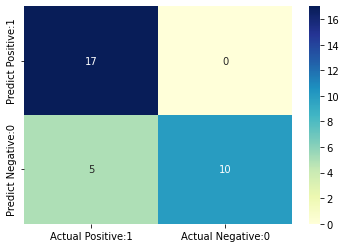

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],  index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                                               precision    recall  f1-score   support

Turn Ethical Frameworks into Actionable Steps       0.77      1.00      0.87        17
                        What is Data Science?       1.00      0.67      0.80        15

                                     accuracy                           0.84        32
                                    macro avg       0.89      0.83      0.84        32
                                 weighted avg       0.88      0.84      0.84        32



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8438


In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1562


In [ ]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7727


In [ ]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7727


In [ ]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [ ]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


In [ ]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob

array([[1.00000000e+00, 1.22888705e-47],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 9.98575768e-48],
       [1.00000000e+00, 5.56672912e-48],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 8.78465898e-48],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00]])

In [ ]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['<17','=>17'])
y_pred_prob_df

,<17,=>17
0,1.0,1.228887e-47
1,0.0,1.000000e+00
2,1.0,9.985758e-48
3,1.0,5.566729e-48
4,0.0,1.000000e+00
5,1.0,8.784659e-48
6,1.0,0.000000e+00
7,0.0,1.000000e+00
8,0.0,1.000000e+00
9,1.0,0.000000e+00


In [ ]:
gnb.predict_proba(X_test)[0:10, 1]

array([1.22888705e-47, 1.00000000e+00, 9.98575768e-48, 5.56672912e-48,
       1.00000000e+00, 8.78465898e-48, 0.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00])

In [ ]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]

In [ ]:
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities')
plt.ylabel('Frequency')

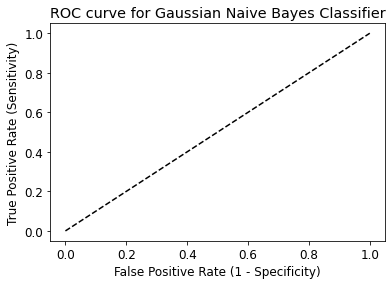

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8961


In [ ]:
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7304


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.5        0.5        0.5        0.375      0.71428571 0.57142857
 0.71428571 0.71428571 0.57142857 0.71428571]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.5875
